[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/tutorials/feature-use/classification.ipynb)

# Classification
The classification wrapper from Neural Prophet (`Classification_NP`) can be used in case a binary classification task is needed for time series. It is very useful in anomaly detection applications. In this notebook, we will build a classification model using data from the eye state dataset from the paper _A First Step towards Eye State Prediction Using EEG_ (http://suendermann.com/su/pdf/aihls2013.pdf) 

First, we load the data:

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes

import pandas as pd
from neuralprophet import Classification_NP, set_log_level
from neuralprophet import set_random_seed
import matplotlib.pyplot as plt
set_random_seed(8)
set_log_level("ERROR", "INFO")

In [2]:
data_location = "https://raw.githubusercontent.com/mateusgheorghe/neuralprophet-data/main/datasets/"
# df = pd.read_csv(data_location + "eeg_eyes_state_no_outliers.csv")
df = pd.read_csv("eeg_eyes_state_no_outliers.csv")
df.head()

,ds,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,y
0,2013-09-09 00:00:00.000000,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,2013-09-09 00:00:00.008000,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,2013-09-09 00:00:00.016000,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,2013-09-09 00:00:00.024000,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,2013-09-09 00:00:00.032000,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


The data present EEG measurements of 14980 instances with 15 attributes (14 attributes representing the values of the electrodes and the last column, `y`, the eye state). The data was gathered during 117 seconds (14980 samples in 117 secs =~ 128 samples per second -> freq = 1/128 sec =~ 0.0078 sec =~ 8 milisec = 8L).

The presented data were pre-processed to remove outliers (values > 3 standard deviations). 

We are going to use two of the attributes (`F7` and `F8`) and 64 lags (approximately 0.5 seconds) to predict the next step eye state. The dataset will be arbitrarily split in 10% for validation.

In [3]:
df1=df[['ds','y','F7','F8']].copy(deep=True)
m = Classification_NP(num_hidden_layers=1)
m.add_lagged_regressor(['F7','F8'],n_lags=64)
df_train, df_test = m.split_df(df1, valid_p = 0.33, local_split = True, freq='8L')

In the following, one can notice the two of the chosen attributes from the EEG measurements (`F7` and `F8`) plus the eye state (0 eye open and 1 eye shut) for the train and test dataset.

In [4]:
def plot_feats(df,feats):
    plt.figure(figsize=(10,10))
    cont=1
    for col in feats:
        plt.subplot(len(feats),1,cont)
        plt.plot(df['ds'],df[col],label=col)
        plt.grid()
        plt.legend()
        cont=cont+1
    plt.tight_layout()
    plt.show()

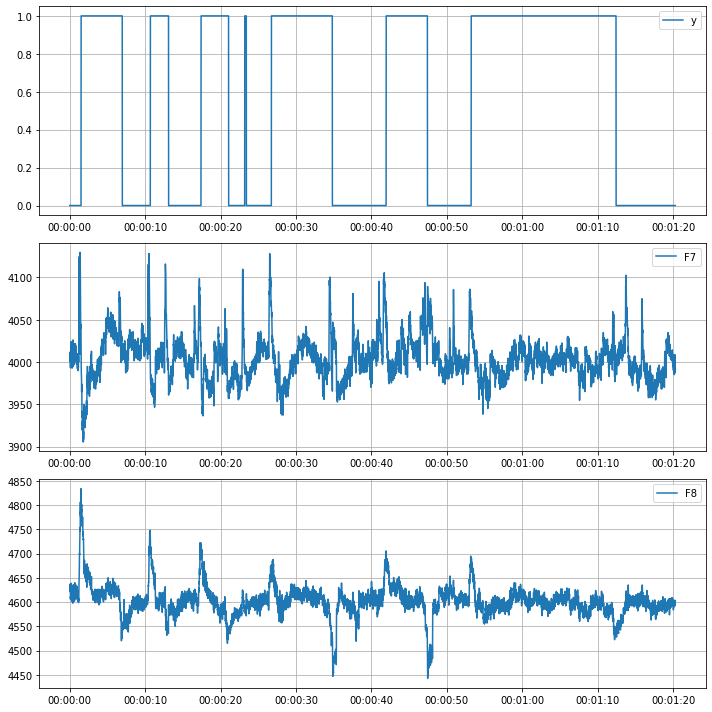

In [5]:
plot_feats(df_train,['y','F7','F8'])

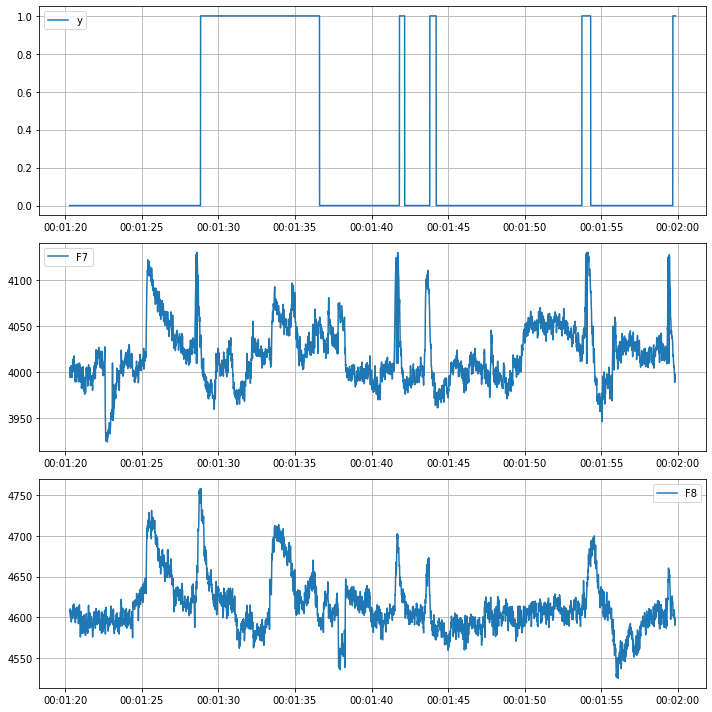

In [6]:
plot_feats(df_test,['y','F7','F8'])

After creating an object of the `Classification_NP`, a model can be created by calling the `fit` function. Notice that the n_lags are only set for the lagged regressors. We do not set the n_lags instantiating the `Classification_NP` as autoregression should not be used (the `y` column is the label).

In [7]:
train_metrics = m.fit(df_train,freq='8L')

  0%|          | 0/150 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/My_environments/NP_env_v3/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



  0%|          | 0/150 [00:00<?, ?it/s]

In [8]:
forecast=m.predict(df_train)
forecast

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/Neural_Prophet_Project/neural_prophet/neuralprophet/forecaster.py:2202: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/Neural_Prophet_Project/neural_prophet/neuralprophet/forecaster.py:1512: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/My_environments/NP_env_v3/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



,ds,y,yhat_raw1,residual1,lagged_regressor_F71,lagged_regressor_F81,trend,yhat1
0,2013-09-09 00:00:00.000,0.0,None,NaN,None,None,None,NaN
1,2013-09-09 00:00:00.008,0.0,None,NaN,None,None,None,NaN
2,2013-09-09 00:00:00.016,0.0,None,NaN,None,None,None,NaN
3,2013-09-09 00:00:00.024,0.0,None,NaN,None,None,None,NaN
4,2013-09-09 00:00:00.032,0.0,None,NaN,None,None,None,NaN
...,...,...,...,...,...,...,...,...
10032,2013-09-09 00:01:20.256,0.0,0.000006,0.000006,0.0,0.0,-11.945288,0.0
10033,2013-09-09 00:01:20.264,0.0,0.000006,0.000006,0.0,0.0,-11.957502,0.0
10034,2013-09-09 00:01:20.272,0.0,0.000006,0.000006,0.0,0.0,-11.969709,0.0
10035,2013-09-09 00:01:20.280,0.0,0.000006,0.000006,0.0,0.0,-11.981916,0.0


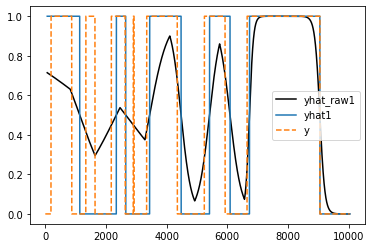

In [9]:
plt.plot(forecast['yhat_raw1'],'black',label='yhat_raw1')
plt.plot(forecast['yhat1'],label='yhat1')
plt.plot(forecast['y'],'--',label='y')
plt.legend()
plt.show()

In [10]:
train_metrics = m.test(df_train)
train_metrics

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/My_environments/NP_env_v3/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



,BCELoss,Accuracy,Balanced_Accuracy,F1Score
0,0.362262,0.845483,0.813086,0.708688


In [11]:
forecast=m.predict(df_test)
forecast

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/Neural_Prophet_Project/neural_prophet/neuralprophet/forecaster.py:2202: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/Neural_Prophet_Project/neural_prophet/neuralprophet/forecaster.py:1512: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/My_environments/NP_env_v3/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



,ds,y,yhat_raw1,residual1,lagged_regressor_F71,lagged_regressor_F81,trend,yhat1
0,2013-09-09 00:01:20.296,0.0,None,NaN,None,None,None,NaN
1,2013-09-09 00:01:20.304,0.0,None,NaN,None,None,None,NaN
2,2013-09-09 00:01:20.312,0.0,None,NaN,None,None,None,NaN
3,2013-09-09 00:01:20.320,0.0,None,NaN,None,None,None,NaN
4,2013-09-09 00:01:20.328,0.0,None,NaN,None,None,None,NaN
...,...,...,...,...,...,...,...,...
4938,2013-09-09 00:01:59.800,1.0,0.0,-1.0,0.0,0.0,-72.292023,0.0
4939,2013-09-09 00:01:59.808,1.0,0.0,-1.0,0.0,0.0,-72.30423,0.0
4940,2013-09-09 00:01:59.816,1.0,0.0,-1.0,0.0,0.0,-72.316437,0.0
4941,2013-09-09 00:01:59.824,1.0,0.0,-1.0,0.0,0.0,-72.328644,0.0


One can notice the raw forecast of the models (`yhat_raw1`, value between 0 and 1) and the the rounded forecast (`yhat1`)

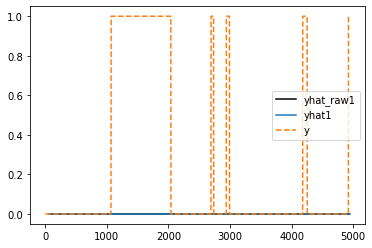

In [12]:
plt.plot(forecast['yhat_raw1'],'black',label='yhat_raw1')
plt.plot(forecast['yhat1'],label='yhat1')
plt.plot(forecast['y'],'--',label='y')
plt.legend()
plt.show()

You can also see the metrics for the test dataset.

In [13]:
test_metrics = m.test(df_test)
test_metrics

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/My_environments/NP_env_v3/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



,BCELoss,Accuracy,Balanced_Accuracy,F1Score
0,8.321579,0.762451,0.60494,0.0


______________________________________________


We are going to use two of the attributes (`F7` and `F8`) and 64 lags (approximately 0.5 seconds) to predict the next step eye state. The dataset will be arbitrarily split in 10% for validation.

In [14]:
m = Classification_NP(num_hidden_layers=1)
all_feats=list(df.columns[1:-1])
all_feats
m.add_lagged_regressor(all_feats,n_lags=64)
df_train, df_test = m.split_df(df, valid_p = 0.33, local_split = True, freq='8L')

In the following, one can notice the two of the chosen attributes from the EEG measurements (`F7` and `F8`) plus the eye state (0 eye open and 1 eye shut) for the train and test dataset.

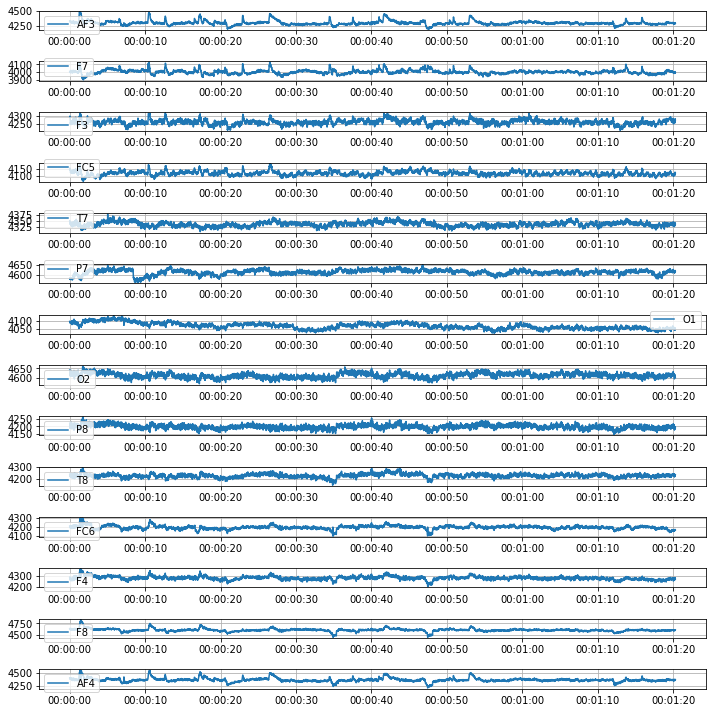

In [15]:
plot_feats(df_train,all_feats)

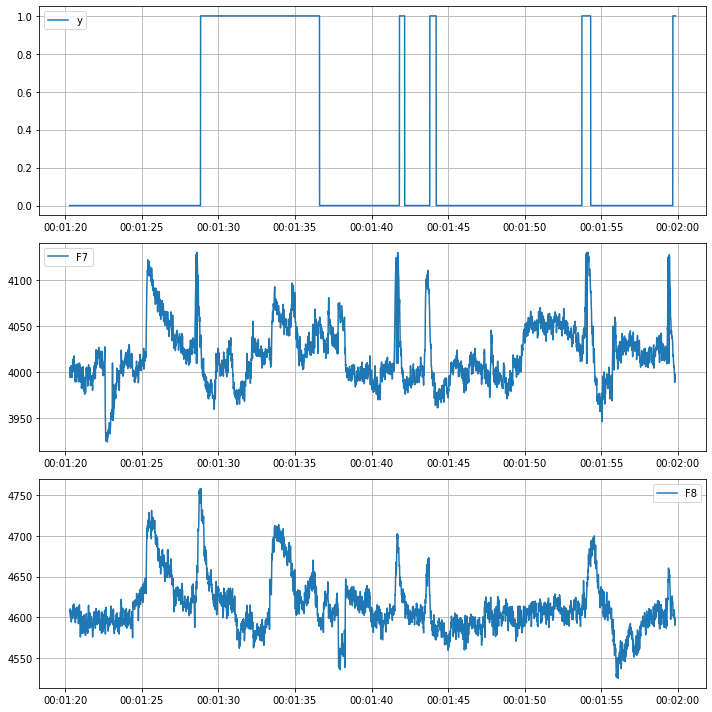

In [16]:
plot_feats(df_test,['y','F7','F8'])

After creating an object of the `Classification_NP`, a model can be created by calling the `fit` function. Notice that the n_lags are only set for the lagged regressors. We do not set the n_lags instantiating the `Classification_NP` as autoregression should not be used (the `y` column is the label).

In [17]:
train_metrics = m.fit(df_train,freq='8L')

  0%|          | 0/150 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/My_environments/NP_env_v3/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



  0%|          | 0/150 [00:00<?, ?it/s]

In [18]:
forecast=m.predict(df_train)
forecast

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/Neural_Prophet_Project/neural_prophet/neuralprophet/forecaster.py:2202: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/Neural_Prophet_Project/neural_prophet/neuralprophet/forecaster.py:1512: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/My_environments/NP_env_v3/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



,ds,y,yhat_raw1,residual1,lagged_regressor_AF31,lagged_regressor_F71,lagged_regressor_F31,lagged_regressor_FC51,lagged_regressor_T71,lagged_regressor_P71,lagged_regressor_O11,lagged_regressor_O21,lagged_regressor_P81,lagged_regressor_T81,lagged_regressor_FC61,lagged_regressor_F41,lagged_regressor_F81,lagged_regressor_AF41,trend,yhat1
0,2013-09-09 00:00:00.000,0.0,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
1,2013-09-09 00:00:00.008,0.0,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
2,2013-09-09 00:00:00.016,0.0,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
3,2013-09-09 00:00:00.024,0.0,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
4,2013-09-09 00:00:00.032,0.0,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,2013-09-09 00:01:20.256,0.0,0.000006,0.000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.764679,0.0,-15.816868,0.0
10033,2013-09-09 00:01:20.264,0.0,0.000006,0.000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.782588,0.0,-15.830509,0.0
10034,2013-09-09 00:01:20.272,0.0,0.000006,0.000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.838929,0.0,-15.844151,0.0
10035,2013-09-09 00:01:20.280,0.0,0.000006,0.000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.850926,0.0,-15.857792,0.0


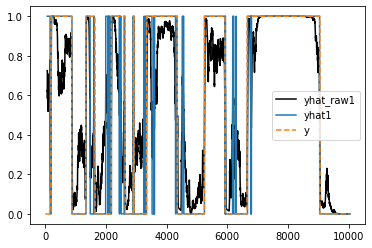

In [19]:
plt.plot(forecast['yhat_raw1'],'black',label='yhat_raw1')
plt.plot(forecast['yhat1'],label='yhat1')
plt.plot(forecast['y'],'--',label='y')
plt.legend()
plt.show()

In [20]:
train_metrics = m.test(df_train)
train_metrics

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/My_environments/NP_env_v3/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



,BCELoss,Accuracy,Balanced_Accuracy,F1Score
0,0.217008,0.922792,0.909019,0.823235


In [21]:
forecast=m.predict(df_test)
forecast

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/Neural_Prophet_Project/neural_prophet/neuralprophet/forecaster.py:2202: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/Neural_Prophet_Project/neural_prophet/neuralprophet/forecaster.py:1512: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/My_environments/NP_env_v3/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



,ds,y,yhat_raw1,residual1,lagged_regressor_AF31,lagged_regressor_F71,lagged_regressor_F31,lagged_regressor_FC51,lagged_regressor_T71,lagged_regressor_P71,lagged_regressor_O11,lagged_regressor_O21,lagged_regressor_P81,lagged_regressor_T81,lagged_regressor_FC61,lagged_regressor_F41,lagged_regressor_F81,lagged_regressor_AF41,trend,yhat1
0,2013-09-09 00:01:20.296,0.0,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
1,2013-09-09 00:01:20.304,0.0,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
2,2013-09-09 00:01:20.312,0.0,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
3,2013-09-09 00:01:20.320,0.0,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
4,2013-09-09 00:01:20.328,0.0,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,2013-09-09 00:01:59.800,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.692791,0.0,-83.25074,0.0
4939,2013-09-09 00:01:59.808,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.769981,0.0,-83.264381,0.0
4940,2013-09-09 00:01:59.816,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.844672,0.0,-83.278008,0.0
4941,2013-09-09 00:01:59.824,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.909234,0.0,-83.291664,0.0


One can notice the raw forecast of the models (`yhat_raw1`, value between 0 and 1) and the the rounded forecast (`yhat1`)

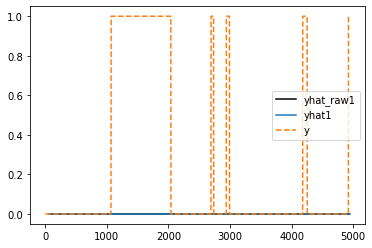

In [22]:
plt.plot(forecast['yhat_raw1'],'black',label='yhat_raw1')
plt.plot(forecast['yhat1'],label='yhat1')
plt.plot(forecast['y'],'--',label='y')
plt.legend()
plt.show()

You can also see the metrics for the test dataset.

In [23]:
test_metrics = m.test(df_test)
test_metrics

WARNING - (py.warnings._showwarnmsg) - /mnt/c/Users/Pateu/My_environments/NP_env_v3/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



,BCELoss,Accuracy,Balanced_Accuracy,F1Score
0,8.463122,0.762451,0.60494,0.0
